In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt
import chart_studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html

In [2]:
chart_studio.tools.set_credentials_file(username='ralhusban', api_key='0F7vaylJaEkkbwUk3SLi')

In [3]:
C19_prisons = pd.read_csv('https://query.data.world/s/o5w4f4agd2d5apuokhqn72p6okpydr', parse_dates=True)
prison_population = pd.read_csv('https://query.data.world/s/dvi2l5alyb7lklby256vno3ymw7pqq')
prison_staff = pd.read_csv('https://query.data.world/s/tk7zj77mi5nw32uhgfzstnurxiwnfl')
BOP_DF= pd.read_csv('BOPC19.csv')
COVID_PrisonData_df=pd.read_csv('covidprisondata_facility_historical.csv', parse_dates=True)

In [4]:
C19_prisons.as_of_date=pd.to_datetime(C19_prisons.as_of_date)

In [5]:
C19_Federal=C19_prisons[C19_prisons.name=='Federal']
C19_Federal.reset_index(inplace=True)
C19_Federal.drop(columns='index', inplace=True)

C:\Users\amg_m\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
State_pop=prison_population[prison_population.name!='Federal'].april_pop.sum()

In [7]:
State_pop

1169803

In [8]:
Federal_pop=prison_population[prison_population.name=='Federal'].april_pop.sum()


In [9]:
Total_state_cases=C19_prisons.iloc[:50].total_prisoner_cases.sum()

In [10]:
Federal_pop

172349

In [11]:
pop_of_interest=380

In [12]:
C19_Federal

name abbreviation  staff_tests  prisoner_tests  total_staff_cases  \
0  Federal           US          NaN             NaN              548.0   
1  Federal           US          NaN             NaN              514.0   
2  Federal           US          NaN             NaN              475.0   
3  Federal           US          NaN             NaN              394.0   
4  Federal           US          NaN             NaN              283.0   
5  Federal           US          NaN             NaN               92.0   
6  Federal           US          NaN             NaN               37.0   
7  Federal           US          NaN             NaN                8.0   

   total_prisoner_cases  total_staff_deaths  total_prisoner_deaths as_of_date  \
0                4365.0                 0.0                   52.0 2020-05-13   
1                2701.0                 0.0                   42.0 2020-05-06   
2                1979.0                 0.0                   31.0 2020-04-29   
3                 838.0                 0.0                   24.0 2020-04-22   
4                 509.0                 0.0                   18.0 2020-04-15   
5                 275.0                 0.0                    8.0 2020-04-08   
6                  60.0                 0.0                    3.0 2020-04-01   
7                  10.0                 0.0                    0.0 2020-03-26   

                                               notes  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Total cases now include recovered patients. 2 ...  
4  Total cases have been updated to include recov...  
5                                                NaN  
6                                                NaN  
7                                                NaN

In [13]:
fig, ax=plt.subplots(figsize=(20,10))
ax.plot(C19_Federal.as_of_date, C19_Federal.total_staff_cases, 'go-.', label=('Staff infected'))
ax.plot(C19_Federal.as_of_date, C19_Federal.total_prisoner_cases, 'bo--', label=('Prisoners infected'))
ax.plot(C19_Federal.as_of_date, C19_Federal.total_prisoner_deaths, 'ro-', label=('Prisoner deaths'))
ax.plot(C19_Federal.as_of_date, C19_Federal.total_staff_deaths, 'ko--', label=('Staff deaths'))
plt.title('COVID-19 in US Federal Facilities \n Data source: The Marshall Project \n Data updated on  '+str(C19_Federal['as_of_date'][0]), fontsize=16)
ax.text(x=dt.datetime(2020,3,25), y=2300,s='Total Infections: '+str(C19_Federal.total_prisoner_cases[0]+C19_Federal.total_staff_cases[0]), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=2200,s='Infected prisoners: '+str(C19_Federal.total_prisoner_cases[0]), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=2100,s='Infected staff: '+str(C19_Federal.total_staff_cases[0]), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=2000,s='Prisoner deaths: '+str(C19_Federal.total_prisoner_deaths[0]), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1900,s='Staff deaths: '+str(C19_Federal.total_staff_deaths[0]), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1800,s='Prisoners infected since the last update: '+str(C19_Federal.total_prisoner_cases[0]-C19_Federal.total_prisoner_cases[1]), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1700,s='Prisoners died since the last update: '+str(C19_Federal.total_prisoner_deaths[0]-C19_Federal.total_prisoner_deaths[1]), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1600,s='Infections increase rate since the last udpate: '+str('{0:.2f}'.format((C19_Federal.total_prisoner_cases[0]-C19_Federal.total_prisoner_cases[1])/C19_Federal.total_prisoner_cases[0]*100))+'%', fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1500,s='Deaths increase rate since the last update: '+str('{0:.2f}'.format((C19_Federal.total_prisoner_deaths[0]-C19_Federal.total_prisoner_deaths[1])/C19_Federal.total_prisoner_deaths[0]*100))+'%', fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1400,s='Total population of Federal facilities: '+str(Federal_pop), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1300,s='Percentage of COVID-19 infections: '+str('{0:.3f}'.format(C19_Federal.total_prisoner_cases[0]/Federal_pop)+str('%')), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1200,s='Total population of State facilities: '+str(State_pop), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1100,s='Total Infections in State facilities: '+str(Total_state_cases), fontsize=12)
ax.text(x=dt.datetime(2020,3,25), y=1000,s='Percentage of COVID-19 infections: '+str('{0:.3f}'.format(Total_state_cases/State_pop)+str('%')), fontsize=12)
plt.grid()

plt.legend()
plt.savefig('C19_Federal.pdf', bbox_inches='tight') # This code saves the plot to a PDF file
plt.show()

C:\Users\amg_m\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


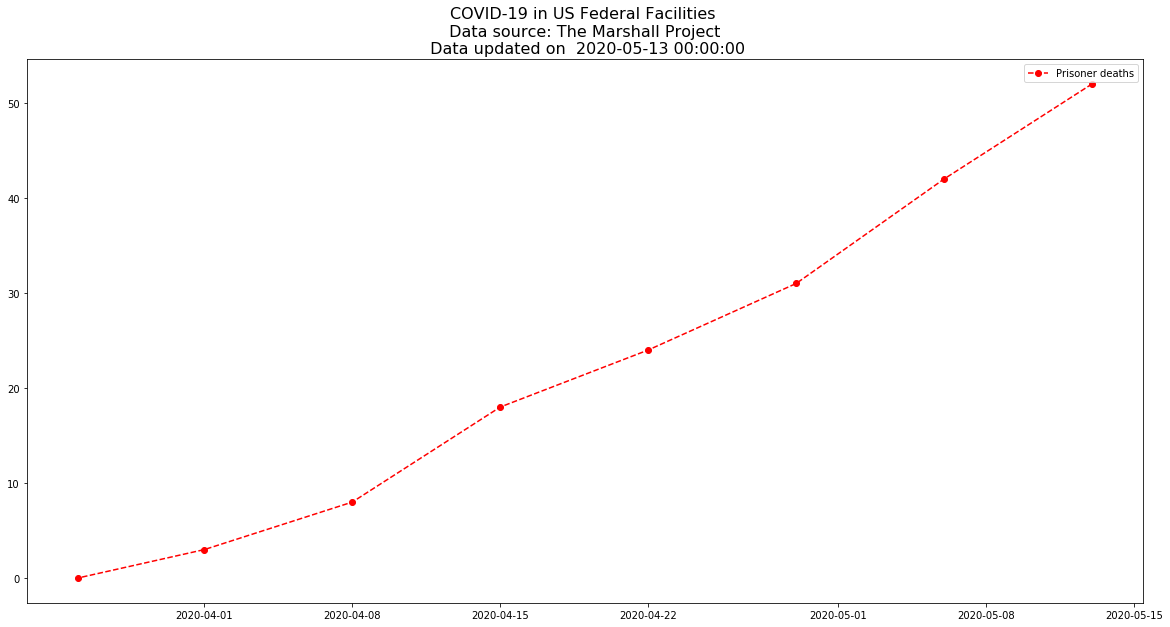

In [14]:
fig, ax=plt.subplots(figsize=(20,10))
#ax.plot(C19_Federal.as_of_date, C19_Federal.total_staff_cases, 'co--', label=('Staff infected'))
#ax.plot(C19_Federal.as_of_date, C19_Federal.total_prisoner_cases, 'bo--', label=('Prisoners infected'))
ax.plot(C19_Federal.as_of_date, C19_Federal.total_prisoner_deaths, 'ro--', label=('Prisoner deaths'))
plt.title('COVID-19 in US Federal Facilities \n Data source: The Marshall Project \n Data updated on  '+str(C19_Federal['as_of_date'][0]), fontsize=16)
plt.legend()
plt.show()

In [15]:
#BOP_DF[BOP_DF.Inmates_positive>10].Inmates_positive

In [16]:
BOP_DF.columns

Index(['Facility  ', 'Inmates Positive  ', 'Staff Positive  ',
       'Inmate Deaths  ', 'Staff Deaths  ', 'Inmates Recovered  ',
       'Staff Recovered  ', 'City  ', 'State  ', 'Population'],
      dtype='object')

In [17]:
BOP_DF.rename(columns={'Facility  ':'Facility', 'Inmates Positive  ':'Inmates_positive', 'Staff Positive  ':'Staff_positive',
       'Inmate Deaths  ':'Inmate_deaths', 'Staff Deaths  ':'Staff_deaths', 'Inmates Recovered  ':'Inmates_recovered',
       'Staff Recovered  ':'Staff_recovered', 'City  ':'City', 'State  ':'State'}, inplace=True)

In [18]:
BOP_grouped=BOP_DF.groupby(['State'], as_index=False).agg({'Inmates_positive':'sum', 'Inmate_deaths':'sum','Staff_positive':'sum', 'Staff_deaths':'sum'})

In [19]:
BOP_grouped.sort_values(by='Inmates_positive', ascending=True, inplace=True)

In [20]:
BOP_DF.sort_values(by='Inmates_positive', ascending=True, inplace=True)

In [21]:
BOP_DF['Percentage_infected']=BOP_DF['Inmates_positive']/BOP_DF['Population']

In [22]:
BOP_DF

Facility  Inmates_positive  Staff_positive  Inmate_deaths  \
81            Tucson USP                 0               0              0   
34           El Reno FCI                 0               1              0   
36         Englewood FCI                 0               0              0   
37           Fairton FCI                 0               1              0   
79       Tallahassee FCI                 0               1              0   
..                   ...               ...             ...            ...   
12   Butner Medium I FCI               166              13              7   
55         Lexington FMC               206               6              1   
38  Forrest City Low FCI               247               1              0   
41        Fort Worth FMC               622               4              7   
56            Lompoc FCI               885              13              0   

    Staff_deaths  Inmates_recovered  Staff_recovered          City State  \
81             0                  0                1        tucson    AZ   
34             0                  0                0       el reno    OK   
36             0                  0                1     littleton    CO   
37             0                  0                1       fairton    NJ   
79             0                  0                0   tallahassee    FL   
..           ...                ...              ...           ...   ...   
12             0                 82               12        butner    NC   
55             0                  1                0     lexington    KY   
38             0                 50                2  forrest city    AR   
41             0                 18                0    fort worth    TX   
56             0                 25                3        lompoc    CA   

    Population  Percentage_infected  
81        1336             0.000000  
34         949             0.000000  
36         963             0.000000  
37        1003             0.000000  
79         893             0.000000  
..         ...                  ...  
12        1495             0.111037  
55        1233             0.167072  
38        1813             0.136238  
41        1467             0.423995  
56        1162             0.761618  

[91 rows x 11 columns]

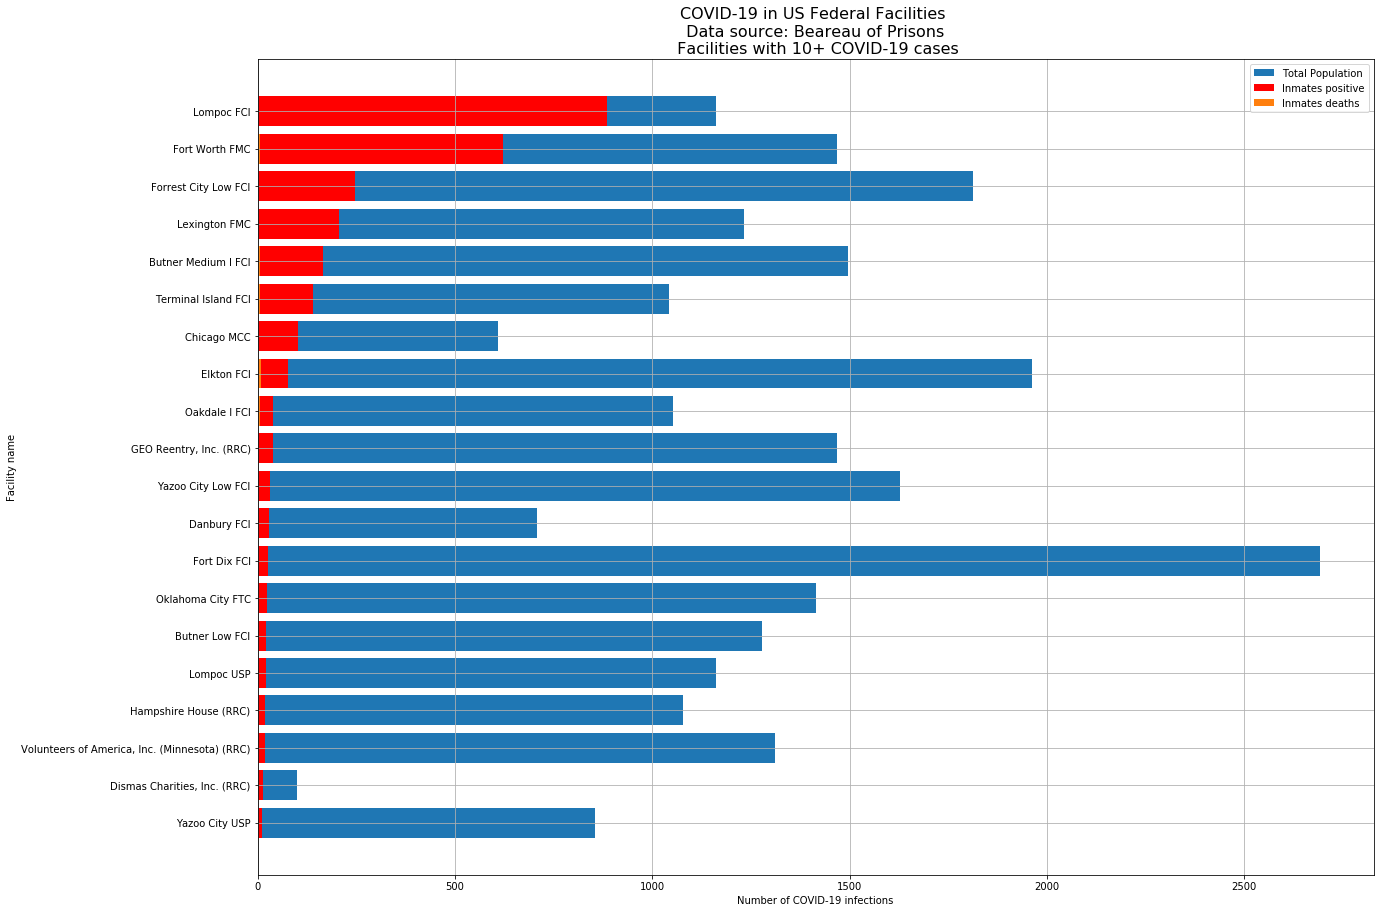

In [23]:
fig, ax=plt.subplots(figsize=(20,15))
#ax.plot(C19_Federal.as_of_date, C19_Federal.total_staff_cases, 'co--', label=('Staff infected'))
#ax.plot(C19_Federal.as_of_date, C19_Federal.total_prisoner_cases, 'bo--', label=('Prisoners infected'))
ax.barh(BOP_DF[BOP_DF.Inmates_positive>10].Facility, BOP_DF[BOP_DF.Inmates_positive>10].Population, label=('Total Population'))
ax.barh(BOP_DF[BOP_DF.Inmates_positive>10].Facility, BOP_DF[BOP_DF.Inmates_positive>10].Inmates_positive, label=('Inmates positive'), color='red')
ax.barh(BOP_DF[BOP_DF.Inmates_positive>10].Facility, BOP_DF[BOP_DF.Inmates_positive>10].Inmate_deaths, label=('Inmates deaths'))
plt.title('COVID-19 in US Federal Facilities \n Data source: Beareau of Prisons \n Facilities with 10+ COVID-19 cases', fontsize=16)
plt.legend()
plt.grid()
plt.xlabel('Number of COVID-19 infections')
plt.ylabel('Facility name')
plt.savefig('C19_BOP_data_per_facility.pdf', bbox_inches='tight') # This code saves the plot to a PDF file
plt.show()

In [24]:
fig, ax=plt.subplots(figsize=(25,10))
#ax.plot(C19_Federal.as_of_date, C19_Federal.total_staff_cases, 'co--', label=('Staff infected'))
#ax.plot(C19_Federal.as_of_date, C19_Federal.total_prisoner_cases, 'bo--', label=('Prisoners infected'))
ax.barh(BOP_grouped.State, BOP_grouped.Inmates_positive, label=('Inmates positive'))
ax.barh(BOP_grouped.State, BOP_grouped.Inmate_deaths, label=('Inmates deaths'))
plt.title('COVID-19 in US Federal Facilities \n Data source: Beareau of Prisons', fontsize=16)
plt.legend()
plt.savefig('C19_BOP_data.pdf', bbox_inches='tight') # This code saves the plot to a PDF file
plt.show()

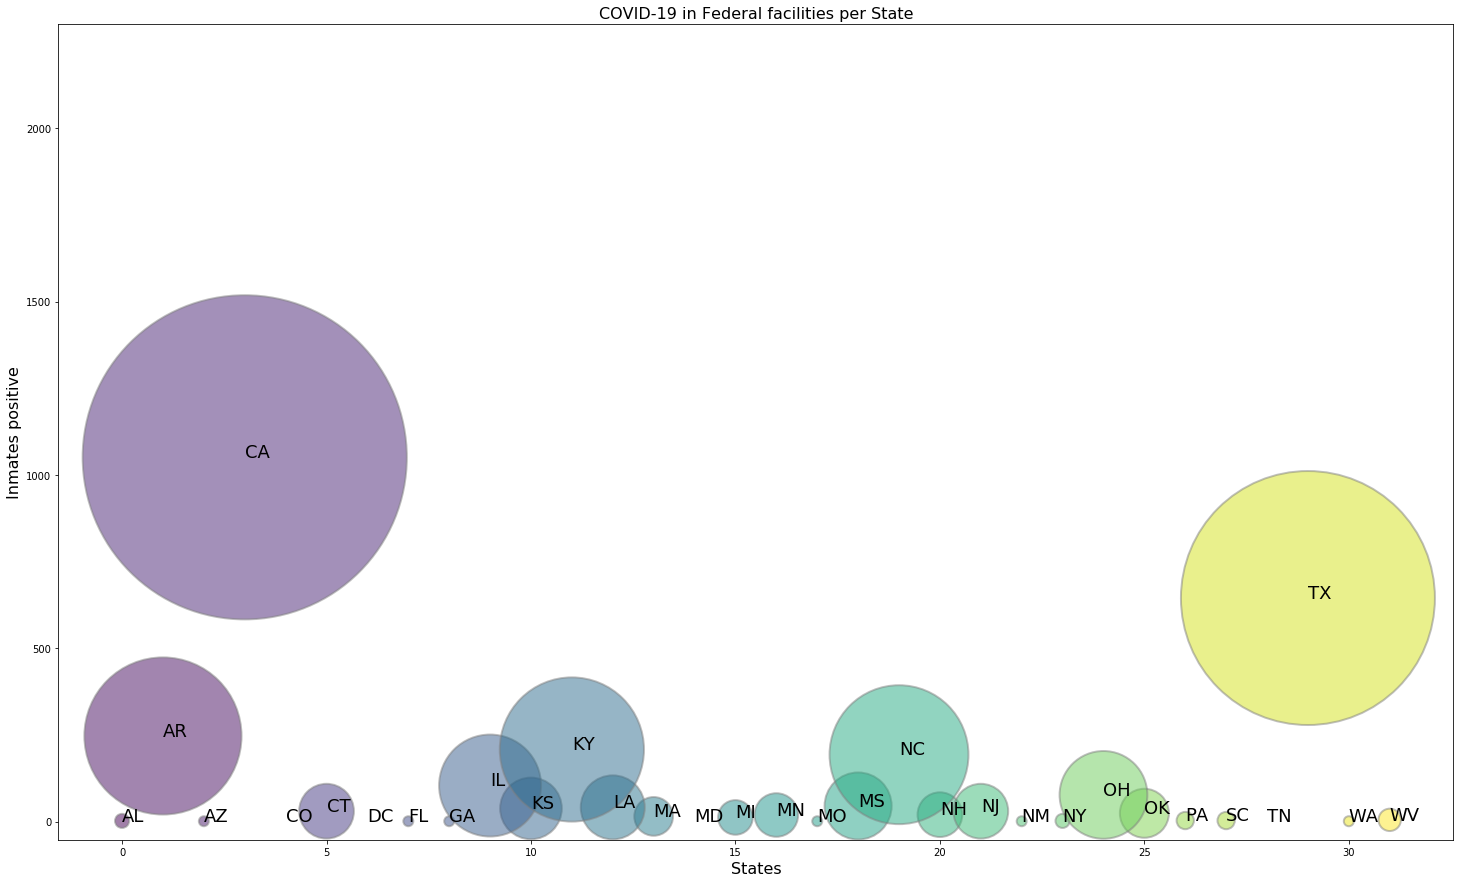

In [25]:
fig, ax=plt.subplots(figsize=(25,15))

# create data
x = BOP_grouped.index
y = BOP_grouped.Inmates_positive
z = BOP_grouped.Inmates_positive*100
#z=z*z
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x,  alpha=0.5, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("States", fontsize=16)
plt.ylabel("Inmates positive", fontsize=16)
plt.title("COVID-19 in Federal facilities per State", fontsize=16)
plt.ylim(top=2300)

for i in range(len(BOP_grouped)):
    plt.annotate(BOP_grouped.State[i], ( i ,BOP_grouped.Inmates_positive[i]), fontsize=18)
plt.savefig('FEDBubble.pdf')
plt.show()

In [26]:
BOP_DF.reset_index(inplace=True)

In [27]:
BOP_DF_more_than_10=BOP_DF[BOP_DF.Inmates_positive>10]

In [28]:
BOP_DF_more_than_10.reset_index(inplace=True)

In [29]:
np.random.randint(1,10,5)

array([2, 1, 3, 5, 7])

In [30]:
fig, ax=plt.subplots(figsize=(25,30))

# create data
x = BOP_DF_more_than_10.Inmates_positive
y = BOP_DF_more_than_10.Population
z = BOP_DF_more_than_10.Percentage_infected*80000
#z=z*z
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x,  alpha=0.5, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Infected inmates", fontsize=16)
plt.ylabel("Total population", fontsize=16)
plt.title("COVID-19 infection rates in Federal facilities", fontsize=16)
plt.grid()
plt.ylim(top=2750)
plt.xlim(right=1000)
ax.text(850, 2700, 'Circle radius: Infection rate', fontsize=14, bbox=dict(facecolor='red', alpha=0.5))

for i in range(len(BOP_DF_more_than_10)):
    plt.annotate(BOP_DF_more_than_10.Facility[i]+', '+BOP_DF_more_than_10.State[i]+'\n '+str('{0:.1f}'.format((BOP_DF_more_than_10.Percentage_infected[i]*100)))+'%', ( BOP_DF_more_than_10.Inmates_positive[i]-30 ,BOP_DF_more_than_10.Population[i]), fontsize=12)
plt.savefig('FEDBubble_per_facility.pdf')
plt.show()

In [31]:
BOP_grouped.head(50)

State  Inmates_positive  Inmate_deaths  Staff_positive  Staff_deaths
28    TN                 0              0               1             0
4     CO                 0              0               0             0
6     DC                 0              0               0             0
14    MD                 0              0               2             0
2     AZ                 1              1               0             0
7     FL                 1              0              17             0
8     GA                 1              0               7             0
22    NM                 1              0               0             0
17    MO                 1              0               0             0
30    WA                 1              0               0             0
0     AL                 2              0               5             0
23    NY                 2              1              44             0
27    SC                 3              0               2             0
26    PA                 3              0               3             0
31    WV                 5              0               1             0
15    MI                12              3              11             0
13    MA                15              1               2             0
16    MN                19              0               1             0
20    NH                20              0               0             0
25    OK                24              1               1             0
5     CT                30              1               7             0
21    NJ                30              0               2             0
10    KS                38              0               0             0
12    LA                41              8              25             0
18    MS                45              1              21             0
24    OH                77              9              12             0
9     IL               104              0              15             0
19    NC               193              7              21             0
11    KY               208              1               7             0
1     AR               247              0               4             0
29    TX               645              8              10             0
3     CA              1051              9              45             0

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
#state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
#state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='COVID-19 infections',
    data=BOP_grouped,
    columns=['State', 'Inmates_positive'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.3,
    line_opacity=0.2,
    legend_name='COVID-19 Infections in federal facilities',
    bins=[0, 50, 200,400,600,800,1200,1600],
    nan_fill_color='#ffffff00',
    highlight=True,
    show=True
    
).add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name='COVID-19 deaths',
    data=BOP_grouped,
    columns=['State', 'Inmate_deaths'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.3,
    line_opacity=0.2,
    legend_name='COVID-19 deaths in federal facilities',
    bins=6,
    nan_fill_color='#ffffff00',
    highlight=True
   
    
).add_to(m)



#m.add_child(folium.Popup)

folium.LayerControl().add_to(m)
m.save('C19_Federal.html')
m

fig = px.choropleth(data_frame=BOP_grouped, locations='State', locationmode="USA-states", color='Inmates_positive', scope="usa")
fig.update_layout(height=800, width=1600)
fig.show()

fig = go.Figure(data=go.Choropleth(
    locations=BOP_grouped['State'],
    z=BOP_grouped['Inmates_positive'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=True,
    text=BOP_grouped['State'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Inmates positive"
))

fig.update_layout(
    title_text='COVID-19 in Federal facilities',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)


fig.update_layout(height=800, width=1600)

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)])
app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

fig.show()

In [32]:
import plotly.graph_objects as go


In [34]:



# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= 5, size=int(Federal_pop/1000)),
        y = np.random.uniform(low=0, high= 10, size=int(Federal_pop/1000)),
        mode = 'markers',
        opacity=0.5,
        name='Population of Federal facilities',
        marker = dict(
            line = dict(
                width = 0.5,
                color = 'DarkSlateGrey')
        )
    )
)

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=6, high= 10, size=int(C19_Federal.total_prisoner_cases[0]/1000)),
        y = np.random.uniform(low=0, high= 5, size=int(C19_Federal.total_prisoner_cases[0]/1000)),
        mode = 'markers',
        name='Infections in Federal facilities',
        marker = dict(
            line = dict(
                width = 0.5,
                color = 'DarkSlateGrey')
        )
    )
)
fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= 5, size=int(State_pop/1000)),
        y = np.random.uniform(low=10, high= 20, size=int(State_pop/1000)),
        mode = 'markers',
        name='Population of State facilities',
        opacity=0.5,
        marker = dict(
            line = dict(
                width = 0.5,
                color = 'DarkSlateGrey')
        )
    )
)

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=6, high= 10, size=int(Total_state_cases/1000)),
        y = np.random.uniform(low=10, high= 20, size=int(Total_state_cases/1000)),
        mode = 'markers',
        name='Infections in State facilities',
        marker = dict(
            line = dict(
                width = 0.5,
                color = 'DarkSlateGrey')
        )
    )
)

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=6, high= 10, size=int(pop_of_interest/1000)),
        y = np.random.uniform(low=5, high= 10, size=int(pop_of_interest/1000)),
        mode = 'markers',
        name='Population of interest',
        opacity=0.5,
        marker = dict(
            line = dict(
                width = 10,
                color = 'DarkSlateGrey')
        )
    )
)
fig.update_layout(height=1200, width=1200)
py.plot(fig, filename='Prison_pop_scales')


fig.show()


# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=int(Federal_pop), high= int(State_pop), size=int(State_pop)),
        y = np.random.uniform(low=0, high= int(State_pop), size=int(State_pop/10)),
        mode = 'markers',
        name='Population of State facilities',
        opacity=0.5,
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'purple')
        )
    )
)

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=int(Total_state_cases), high= int(Federal_pop), size=int(Federal_pop)),
        y = np.random.uniform(low=0, high= int(Federal_pop), size=int(Federal_pop)),
        mode = 'markers',
        opacity=0.5,
        name='Population of Federal facilities',
        marker = dict(
            line = dict(
                width = 0.5,
                color = 'blue')
        )
    )
)


fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=int(C19_Federal.total_prisoner_cases[0]), high= int(Total_state_cases), size=int(Total_state_cases)),
        y = np.random.uniform(low=0, high= int(Total_state_cases), size=int(Total_state_cases)),
        mode = 'markers',
        name='Infections in State facilities',
       # opacity=0.5,
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'yellow')
        )
    )
)



fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=int(pop_of_interest), high= int(C19_Federal.total_prisoner_cases[0]), size=int(C19_Federal.total_prisoner_cases[0])),
        y = np.random.uniform(low=0, high= int(C19_Federal.total_prisoner_cases[0]), size=int(C19_Federal.total_prisoner_cases[0])),
        mode = 'markers',
        name='Infections in Federal facilities',
       # opacity=0.5,
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'red')
        )
    )
)



fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= int(pop_of_interest), size=int(pop_of_interest)),
        y = np.random.uniform(low=0, high= int(pop_of_interest), size=int(pop_of_interest)),
        mode = 'markers',
        name='Population of interest',
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'black')
        )
    )
)
fig.update_layout(height=1000, width=1500)


fig.show()

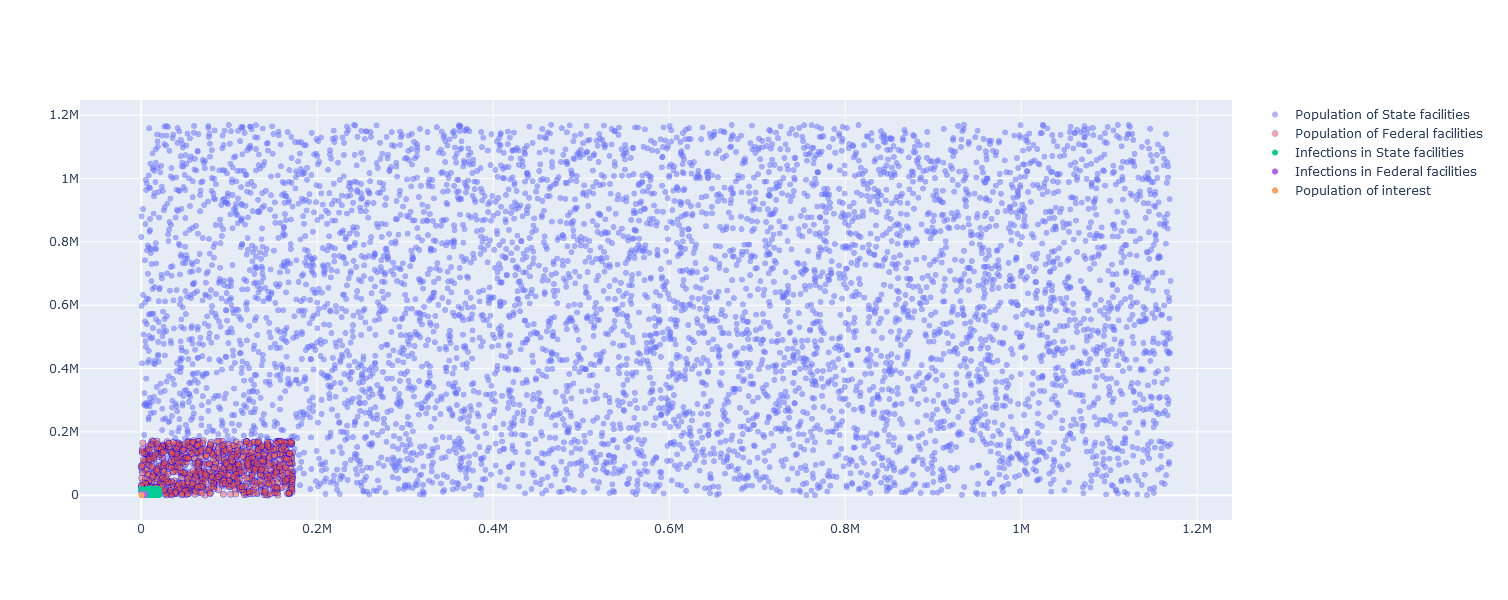

In [47]:
# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= int(State_pop), size=int(State_pop/200)),
        y = np.random.uniform(low=0, high= int(State_pop), size=int(State_pop/200)),
        mode = 'markers',
        name='Population of State facilities',
        opacity=0.5,
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'purple')
        )
    )
)

fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= int(Federal_pop), size=int(Federal_pop/200)),
        y = np.random.uniform(low=0, high= int(Federal_pop), size=int(Federal_pop/200)),
        mode = 'markers',
        opacity=0.5,
        name='Population of Federal facilities',
        marker = dict(
            line = dict(
                width = 0.5,
                color = 'blue')
        )
    )
)


fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= int(Total_state_cases), size=int(Total_state_cases/200)),
        y = np.random.uniform(low=0, high= int(Total_state_cases), size=int(Total_state_cases/200)),
        mode = 'markers',
        name='Infections in State facilities',
       # opacity=0.5,
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'yellow')
        )
    )
)



fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= int(C19_Federal.total_prisoner_cases[0]), size=int(C19_Federal.total_prisoner_cases[0]/200)),
        y = np.random.uniform(low=0, high= int(C19_Federal.total_prisoner_cases[0]), size=int(C19_Federal.total_prisoner_cases[0]/200)),
        mode = 'markers',
        name='Infections in Federal facilities',
       # opacity=0.5,
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'red')
        )
    )
)



fig.add_trace(
    go.Scattergl(
        x = np.random.uniform(low=0, high= int(pop_of_interest), size=int(pop_of_interest/200)),
        y = np.random.uniform(low=0, high= int(pop_of_interest), size=int(pop_of_interest/200)),
        mode = 'markers',
        name='Population of interest',
        marker = dict(
            line = dict(
                width = 0.1,
                color = 'black')
        )
    )
)
fig.update_layout(height=600, width=800)
py.plot(fig, filename='Prison_pop_scales')

fig.show()

In [85]:
chart_studio.tools.set_config_file(world_readable=False,
                             sharing='private')